## 1. Carga y análisis exploratorio de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')

# Los datos se pueden descargar de https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data

In [ ]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Cantidad de registros
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# IDs únicos de cuenta

len(df.CustomerId.unique())

10000

**MEDIDAS DE TENDENCIA CENTRAL**


Los cuartiles son los tres valores que dividen una muestra de datos ordenados en cuatro partes iguales: el 1er cuartil en 25% (Q1), el segundo cuartil en 50% (Q2 o mediana) y el tercer cuartil en 75% (Q3).


*   **1er cuartil**:

El 1er cuartil es el percentil 25 e indica que 25% de los datos es menor que o igual a este valor.


*   **Mediana**:

La mediana es el punto medio del conjunto de datos. El valor de este punto medio es el punto en el cual la mitad de las observaciones está por encima del valor y la otra mitad está por debajo del valor. La mediana se determina jerarquizando las observaciones y hallando la observación que ocupe el número [N + 1] / 2 en el orden jerarquizado. Si el número de observaciones es par, entonces la mediana es el valor promedio de las observaciones jerarquizadas en los números N / 2 y [N / 2] + 1.

Tanto la mediana como la media miden la tendencia central. Sin embargo, valores poco comunes, llamados valores atípicos, pueden afectar a la mediana menos de lo que afectan a la media. Si los datos son simétricos, la media y la mediana son similares.


*   **3er cuartil**:

El tercer cuartil es el percentil 75 e indica que 75% de los datos es menor que o igual a este valor.


*   **Máximo**:

El máximo es el valor más grande de los datos. Se utiliza el máximo para identificar un posible valor atípico o error de entrada de datos. Una de las maneras más sencillas de evaluar la dispersión de los datos consiste en comparar el mínimo y el máximo. Si el valor máximo es muy alto, incluso cuando considere el centro, la dispersión y la forma de los datos, se debe investigar la causa del valor extremo.

In [ ]:
# Medidas de tendencia central

# El 75% de los clientes (es decir, 7500 personas) tiene una edad menor o igual a 44 años, 2 productos bancarios (p.e. tarjetas débito y crédito)
## y no más de 7 años de permanencia en el Banco.

# El 25% de los clientes (es decir, 2500 personas) tienen saldo cero, 3 años de permanencia en el Banco, un producto y no más de 32 años.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Búsqueda de nulos 1
df.isnull().values.any() # El dataset NO tiene nulos

False

In [ ]:
# Búsqueda de nulos 2

df.isnull().sum() # El dataset NO tiene nulos

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Dónde están los nulos?
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography          20
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    12
Exited              0
dtype: int64

In [ ]:
# Eliminación de nulos
df = df.dropna() # Dado que se tienen sólo 20 y 12 entradas nulas para las variables 'Geography' y 'EstimatedSalary'
                 # respectivamente, entre 10000 registros y, teniendo en cuenta que no se pueden hacer inferencias con respecto a
                 # la información de otros registros por corresponder a clientes diferentes, para poder imputar 'correctamente' los datos faltantes,
                 # se decide eliminar estas filas.

In [ ]:
# Búsqueda de registros duplicados
df.duplicated().sum() # No hay registros duplicados

0

0    7963
1    2037
Name: Exited, dtype: int64


[Text(0, 0.5, '')]

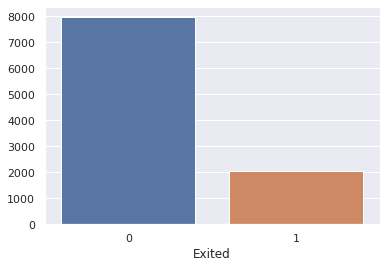

In [ ]:
# Desbalance del dataset

print(df.Exited.value_counts())
ax1 = sns.countplot(data=df, x='Exited')
ax1.set(ylabel='')

#df['Exited'].hist(color='#87CEFA')
#dg = df.groupby(['Exited'])['CustomerId'].count() 
#dg

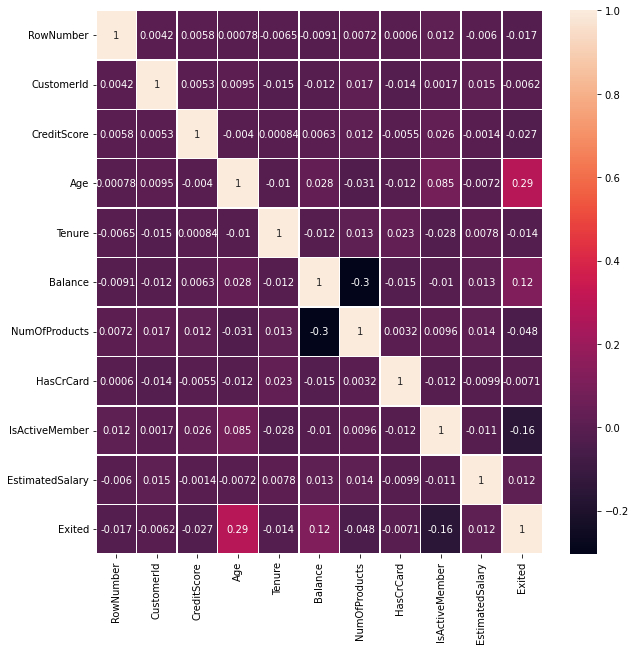

In [ ]:
plt.figure(figsize = (10,10))

corrMatrix = df.corr()

sns.heatmap(corrMatrix, annot=True, linewidths=.5)

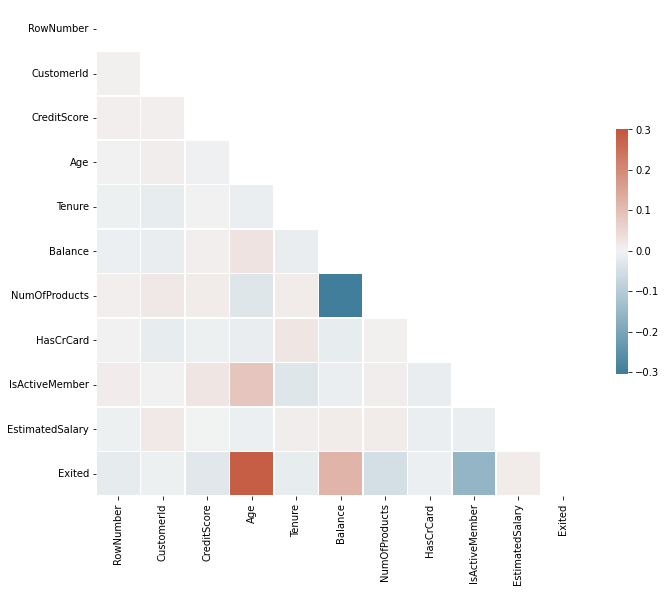

In [ ]:
corr = df.corr()

# generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool))

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#draw the heatpmap ith the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws = {'shrink':.5})

In [ ]:
# Correlaciones con la variable "Exited" (estado de la cuenta: 1 -> Cerrada y 0 -> No Cerrada)

corr.sort_values(by=['Exited'], ascending=False).iloc[0].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

[Text(0, 0.5, '')]

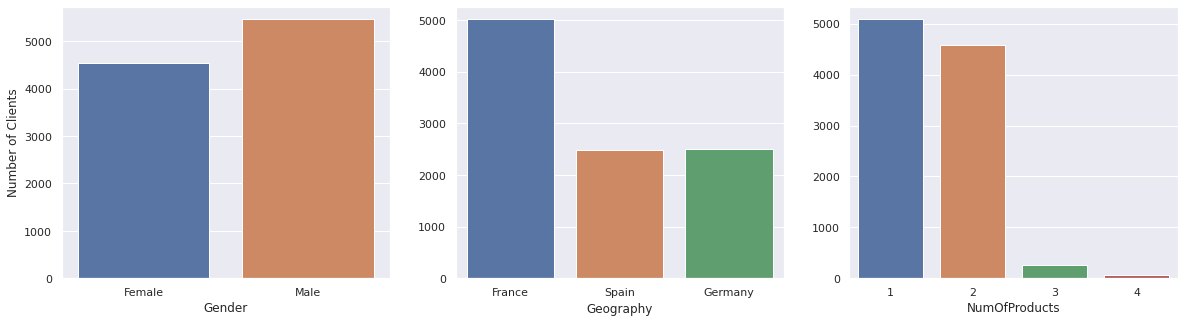

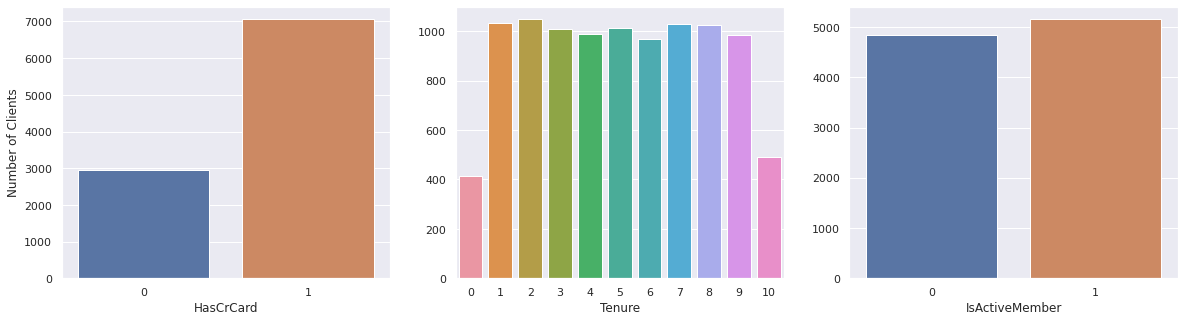

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
ax1 = sns.countplot(data=df, x='Gender')
ax1.set(ylabel="Number of Clients")

plt.subplot(1,3,2)
ax2 = sns.countplot(data=df, x='Geography')
ax2.set(ylabel="")

plt.subplot(1,3,3)
ax3 = sns.countplot(data=df, x='NumOfProducts')
ax3.set(ylabel="")

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
ax4 = sns.countplot(data=df, x='HasCrCard')
ax4.set(ylabel="Number of Clients")

plt.subplot(1,3,2)
ax5 = sns.countplot(data=df, x='Tenure')
ax5.set(ylabel="")

plt.subplot(1,3,3)
ax6 = sns.countplot(data=df, x='IsActiveMember')
ax6.set(ylabel="")

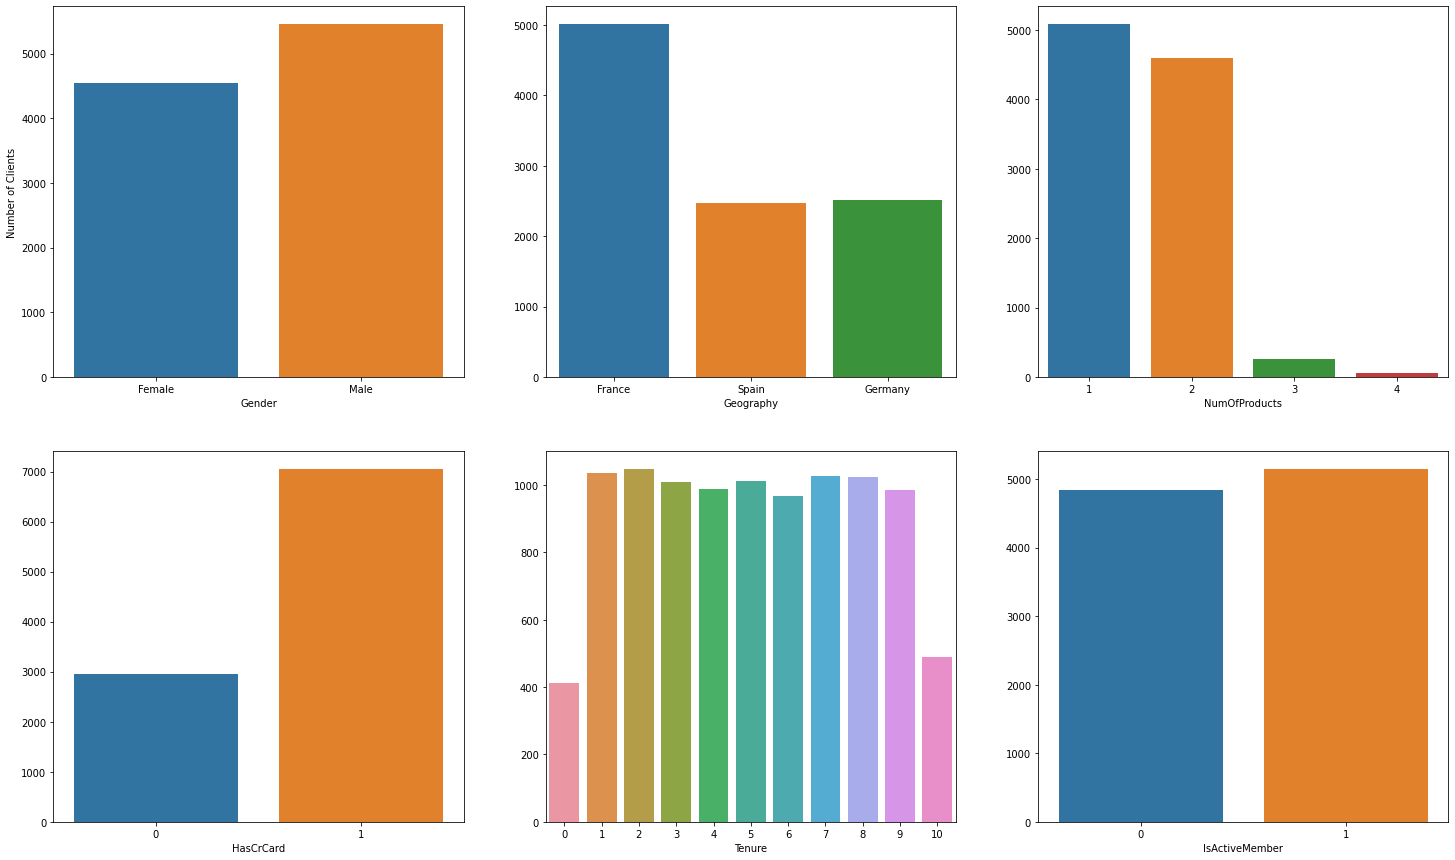

In [ ]:
fig = plt.figure(figsize = (25,15))

plt.subplot(2,3,1)
ax = sns.countplot(data=df, x='Gender')
ax.set(ylabel="Number of Clients")

names = ['', 'Geography', 'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember']

for i in range(1, len(names)):
  plt.subplot(2, len(names)/2, i+1)
  ax = sns.countplot(data=df, x=names[i])
  ax.set(ylabel='')

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


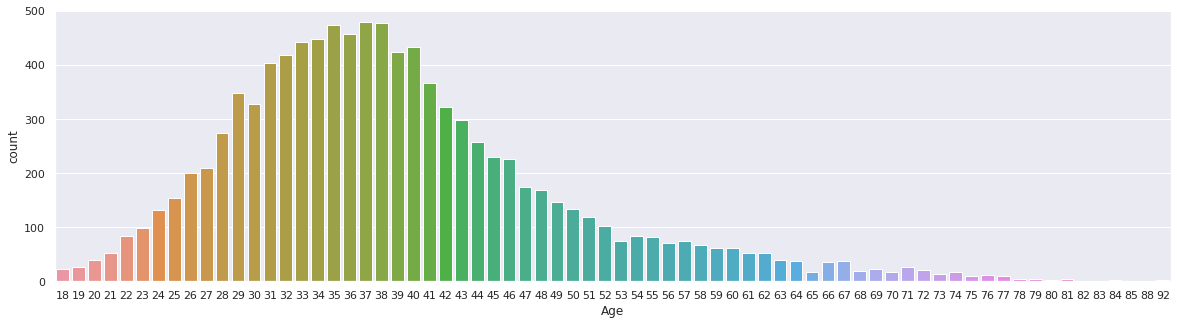

In [ ]:
print(df.Age.value_counts())

fig = plt.figure(figsize = (20,5))

sns.set_theme(style='darkgrid')

ax = sns.countplot(data=df, x='Age')

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 1008x504 with 0 Axes>

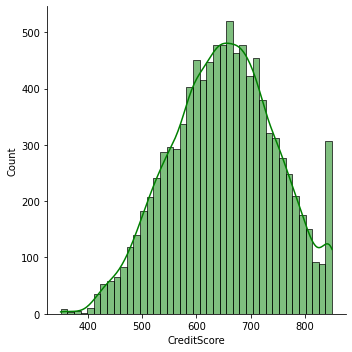

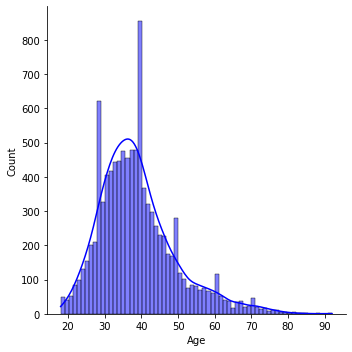

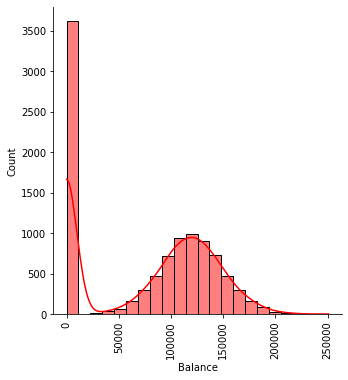

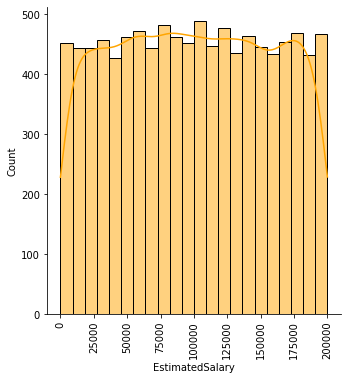

In [ ]:
# Gráficos de distribución

fig = plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.displot(df.CreditScore, color='green', label='CreditScore', kde=True)

plt.subplot(2,2,2)
sns.displot(df.Age, color='blue', label='Age', kde=True)

plt.subplot(2,2,3)
sns.displot(df.Balance, color='red', label='Balance', kde=True)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.displot(df.EstimatedSalary, color='orange', label='EstimatedSalary', kde=True)
plt.xticks(rotation=90)

plt.show()

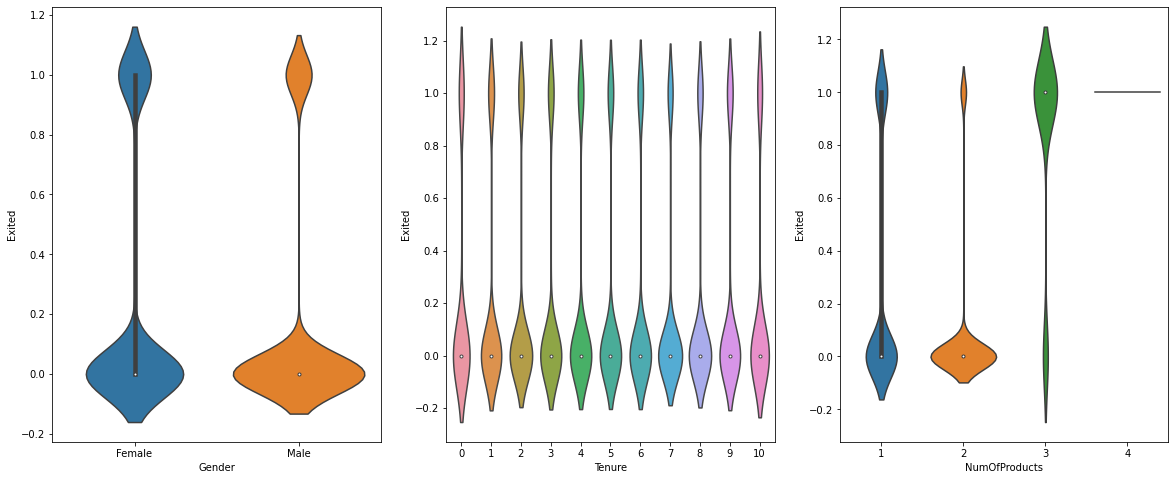

In [ ]:
# Gráficos de violín

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.violinplot(x='Gender', y='Exited', data=df)

plt.subplot(1,3,2)
sns.violinplot(x='Tenure', y='Exited', data=df)

plt.subplot(1,3,3)
sns.violinplot(x='NumOfProducts', y='Exited', data=df)

plt.show()

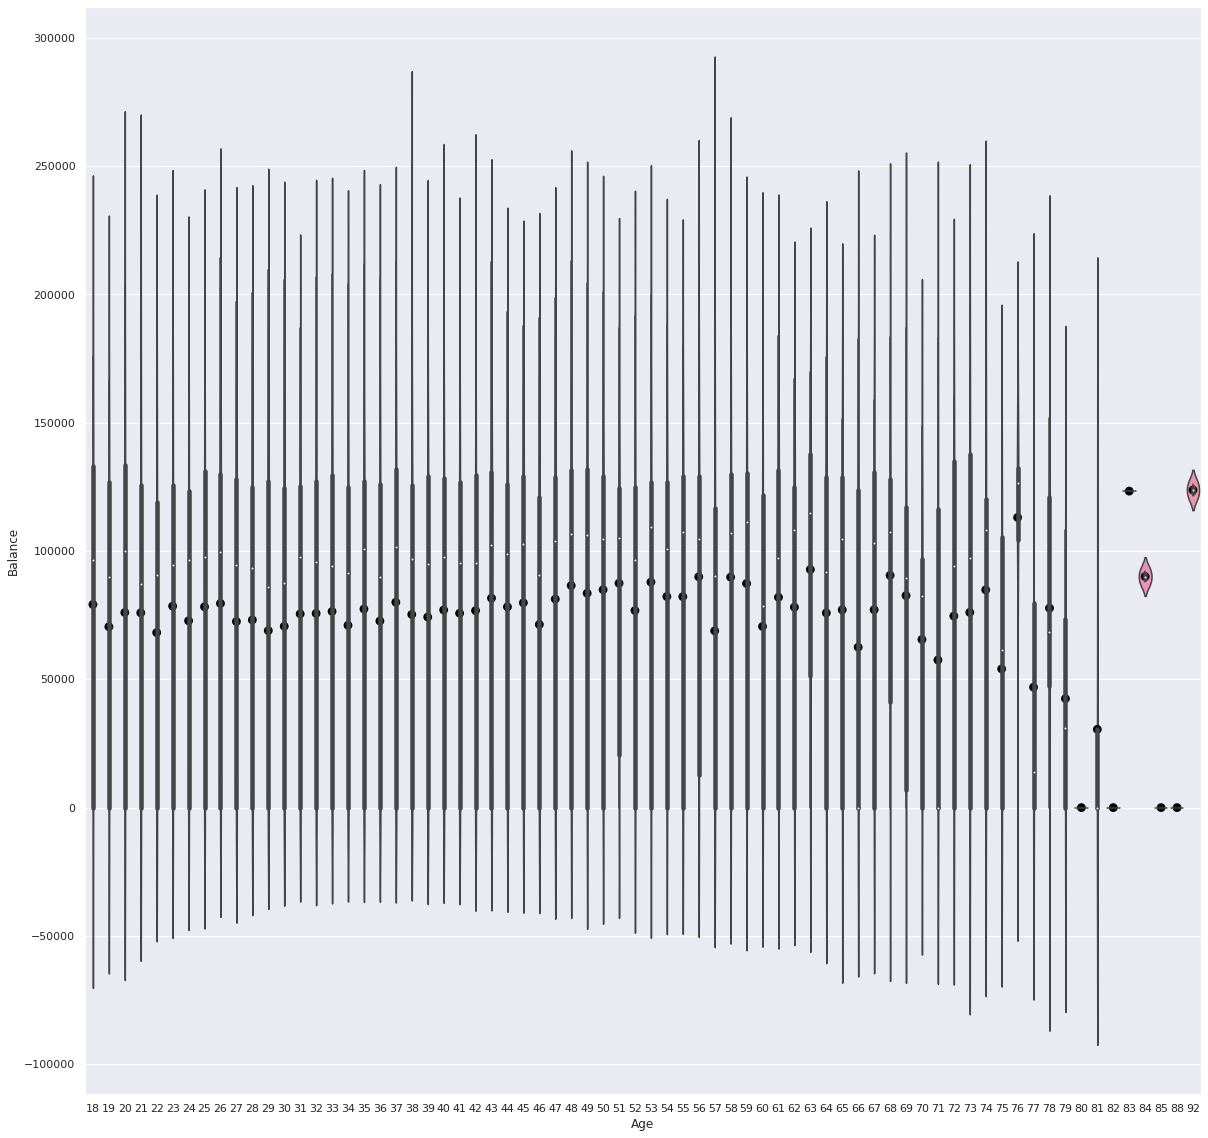

In [ ]:
plt.figure(figsize=(20,20))

sns.set_theme(style='darkgrid')

ax = sns.violinplot(x='Age', y='Balance', data=df)

sns.pointplot(x='Age', y='Balance', data=df, join=False, ci=None, color='black', ax=ax)

In [ ]:
ranges = np.append(18, np.arange(21, 95, 4))
ranges

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93])

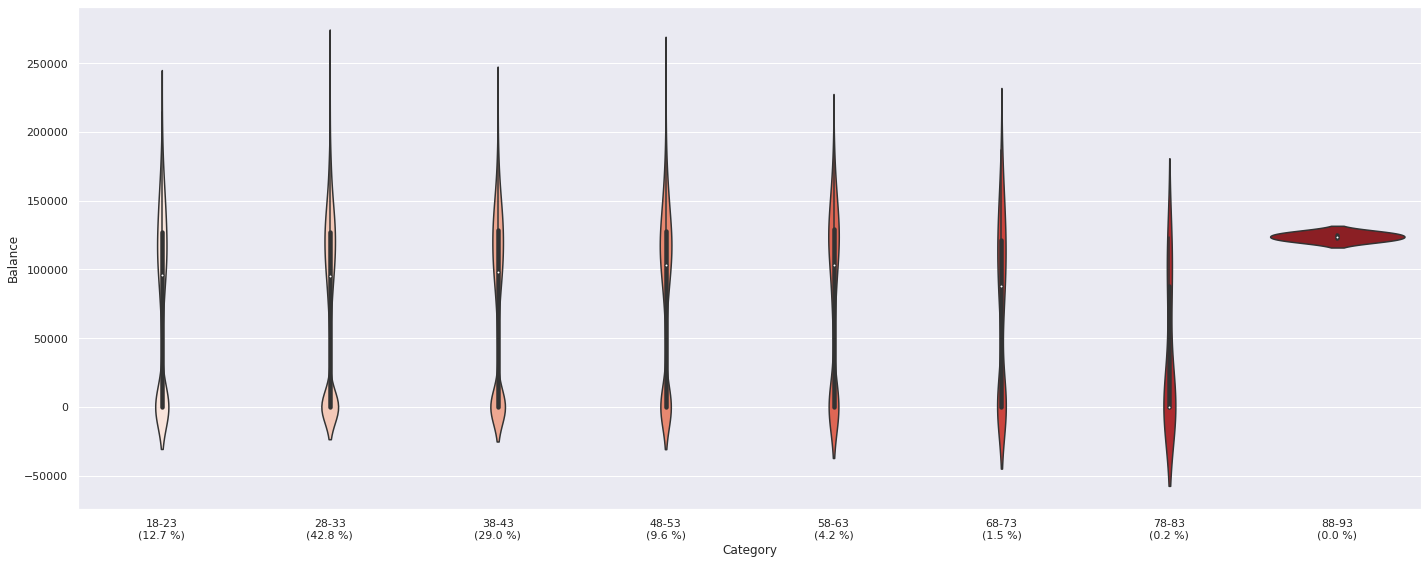

In [ ]:
plt.figure(figsize=(20,20))

ranges = np.append(18, np.arange(23, 92, 5))
df['category'] = pd.cut(df.Age, ranges)
counts = df.groupby(['category'])['Age'].count()

ax = sns.violinplot(x='category', y='Balance', data=df, palette='Reds')
labels = ['18'] + [f'{r + 18}-{r + 5:.2f}' for r in (0,)]
ax.set_xticklabels([f'{label}\n({count / sum(counts) * 100:.1f} %)' for label, count in zip(labels, counts)])
plt.tight_layout()
plt.show()

## 2. Construcción del modelo analítico

In [ ]:
X = df.drop(['CustomerId','Exited'], axis=1)
y = df['Exited']

In [ ]:
X.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57
3,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63
4,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10


In [ ]:
X.shape, y.shape

((9968, 11), (9968,))

In [ ]:
# Codificación de las variables categóricas

df2 = X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

df2 = pd.concat([df2, pd.get_dummies(df["Surname"], prefix='Surname', drop_first=True)], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["Geography"], prefix='Geography', drop_first=True)], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["Gender"], prefix='Gender', drop_first=True)], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["HasCrCard"], prefix='HasCrCard', drop_first=True)], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df["IsActiveMember"], prefix='IsActiveMember', drop_first=True)], axis=1)

In [ ]:
df2.shape

(9968, 2934)

In [ ]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42,2,0.00,1,101348.88,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [ ]:
# Escalamiento de las variables numericas

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
scaler = SS.fit(df2.values)
df2 = scaler.transform(df2.values)

In [ ]:
# División del conjunto de datos en entrenamiento y prueba. Nota: Como el dataset esta desbalanceado, se estratifica.

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

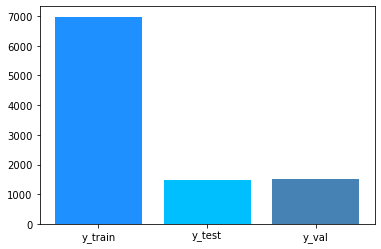

In [ ]:
# Distribución de las etiquetas

u = ['y_train', 'y_test', 'y_val']
v = [y_train.shape[0], y_test.shape[0], y_val.shape[0]]
plt.bar(u, v, color=['#1E90FF','#00BFFF','#4682B4'])
plt.show()

In [ ]:
# Se usarán los dos algorimos de clasificación RandomForestClassifier y GradientBoostingClassifier como baseline,
# ya que los modelos basados en árboles de decisión se comportan muy bien en presencia de outliers, en conjuntos desbalanceados
# y en conjuntos de datos que tienen muchas variables categóricas (en comparación con las numéricas).

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)

## 3. Evaluación del modelo analítico

In [ ]:
# Se calcula el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))

0.8535117056856187
0.8548494983277592


In [ ]:
# Se calcula el score de validación

print(clf1.score(X_val, y_val))
print(clf2.score(X_val, y_val))

0.8522727272727273
0.8482620320855615


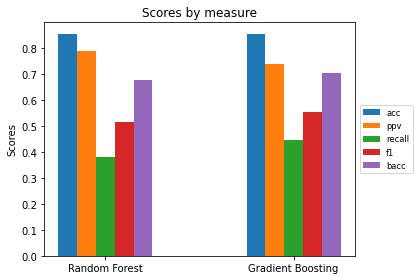

In [ ]:
import numpy  as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

labels = ['Random Forest', 'Gradient Boosting']
measures = ['acc','ppv','recall','f1','bacc']

Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test))])

x = np.arange(len(labels))*2
width = 0.2

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width + 0.3-0.7, Performance[i], width, label=measures[i])
    
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1, loc='center right', fontsize='small', bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[0.97397145 0.02602855]
 [0.61842105 0.38157895]]


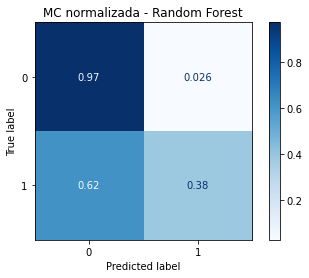

In [ ]:
#Matriz de confusión normalizada para Random Forest

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Random Forest')

print(disp.confusion_matrix)

plt.show()

[[0.95969773 0.04030227]
 [0.55592105 0.44407895]]


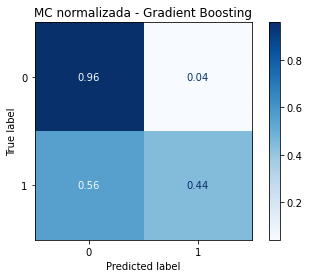

In [ ]:
#Matriz de confusión normalizada para Gradient Boosting

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Gradient Boosting')

print(disp.confusion_matrix)

plt.show()

In [ ]:
# Se puede hacer un ajuste de hiperparámetros partiendo del baseline para mejorar las métricas de desempeño del modelo.

# Aunque ambos modelos arrojan accuracy y precisión similares, Gradient Boosting presenta un recall más alto; esto significa que
# las predicciones positivas (el cliente no permanecerá en el banco) clasificadas correctamente, entre todas las muestras, son más altas.

# El modelo puede ser desplegado como servicio en la nube de Azure y en ambiente local (con Docker), lo que permitirá retroalimentar in situ el modelo,
# y evaluar su desempeño y consumo de máquina.